Init Library

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import warnings
from shapely.geometry import Point, LineString
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

Load Shape file

In [160]:
jbmap = gpd.read_file('shape/jawabarat.shp')

<AxesSubplot:>

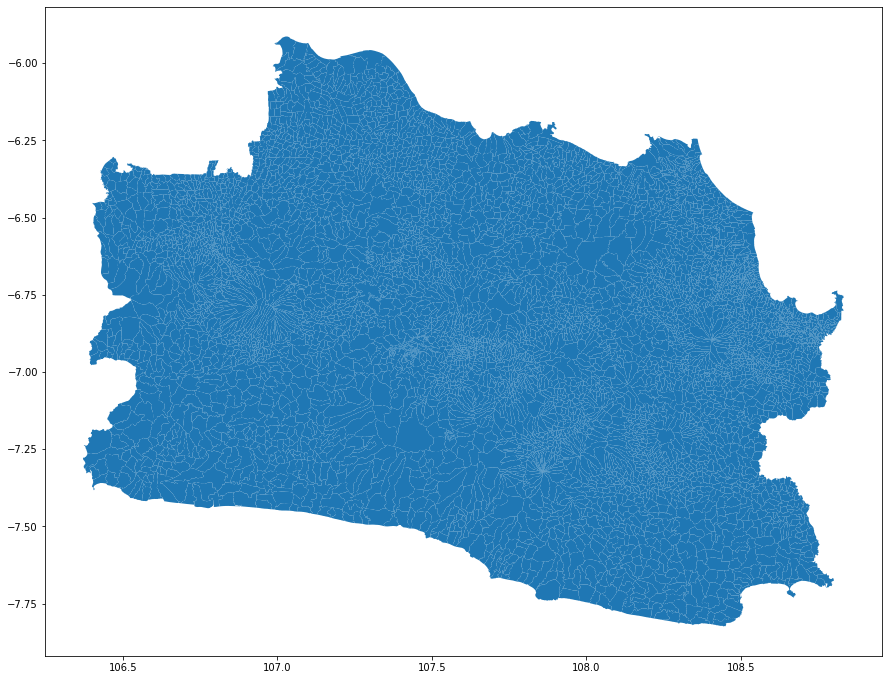

In [181]:
fig,ax = plt.subplots(figsize = (15,15))
jbmap.plot(ax = ax)

Tambah titik koordinat

In [241]:
df = pd.read_csv('shape/tollpoint.csv')
df['gerbang'] = [Point(xy) for xy in zip(df['glong'],df['glat'])]
df['start'] = [Point(xy) for xy in zip(df['slong'],df['slat'])]
df['finish'] = [Point(xy) for xy in zip(df['flong'],df['flat'])]
df['jalan'] = df.apply(lambda x: LineString([x.start, x.finish]), axis=1)
df['centroid'] = df.apply(lambda x: x.jalan.centroid, axis=1)
df = df.drop(columns=['glat','glong','slat','slong','flat','flong','start','finish'])
plot_jalantol = gpd.GeoDataFrame(df.drop(columns=['gerbang','centroid']),geometry=df['jalan'])
plot_gerbangtol = gpd.GeoDataFrame(df.drop(columns=['jalan','centroid']),geometry=df['gerbang'])
plot_centroid = gpd.GeoDataFrame(df.drop(columns=['jalan','gerbang']),geometry=df['centroid'])

,No,Nama,centroid,geometry
0,1,Tes,POINT (107.1403271 -6.661787050000001),POINT (107.14033 -6.66179)
1,2,Tos,POINT (107.89032710000001 -6.91178705),POINT (107.89033 -6.91179)


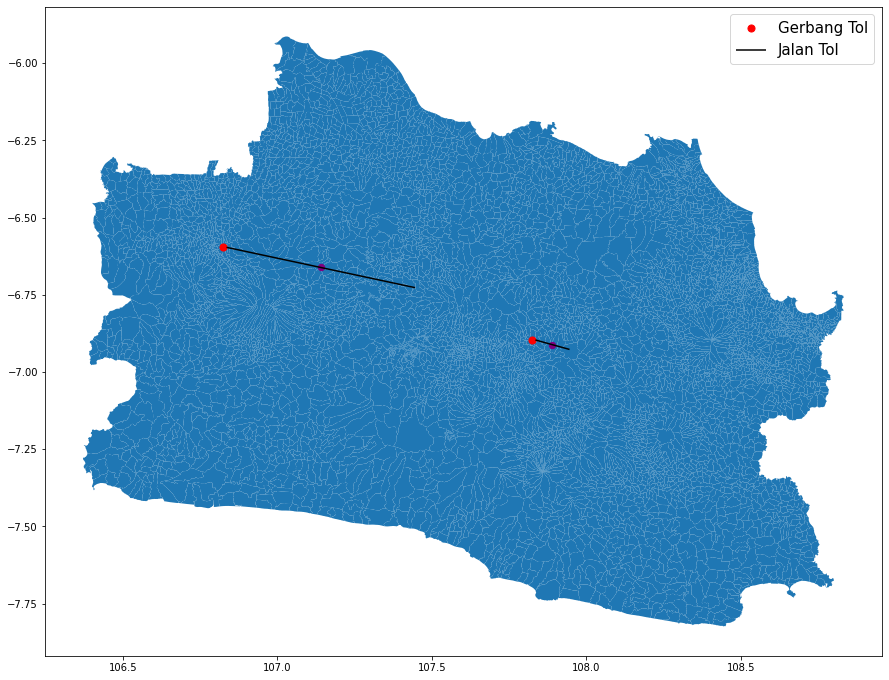

In [245]:
fig,ax = plt.subplots(figsize = (15,15))
jbmap.plot(ax = ax)
plot_gerbangtol.plot(ax=ax, markersize=50, color='red', marker='o', label='Gerbang Tol')
plot_jalantol.plot(ax=ax, markersize=500, color='black', label='Jalan Tol')
plot_centroid.plot(ax=ax, markersize=40, color='purple')
plt.legend(prop = {"size":15})

Tambah lintas / garis Jalan Tol